Initial analysis of perturbation ocean heat runs

In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import xarray as xr
import cmocean as cm
from collections import OrderedDict
import cftime
import glob
import copy

In [2]:
# Define inputs and output folders:
contbase = '/scratch/e14/rmh561/access-om2/archive/1deg_jra55v14_ryf_rcpcont/'

WCWCbase = '/scratch/e14/rmh561/access-om2/archive/1deg_jra55v14_ryf_rcpWCWC/'
WCWCspbase = '/scratch/e14/rmh561/access-om2/archive/1deg_jra55v14_ryf_rcpWCWCpactest/'

In [7]:
cont_temp = xr.open_mfdataset(contbase + 'output006/ocean/ocean-3d-temp*.nc')
WCWC_temp = xr.open_mfdataset(WCWCbase + 'output006/ocean/ocean-3d-temp*.nc')
WCWCsp_temp = xr.open_mfdataset(WCWCspbase + 'output006/ocean/ocean-3d-temp*.nc')

cont_scalar = xr.open_mfdataset(contbase + 'output***/ocean/ocean-scalar*.nc')
WCWC_scalar = xr.open_mfdataset(WCWCbase + 'output***/ocean/ocean-scalar*.nc')
WCWCsp_scalar = xr.open_mfdataset(WCWCspbase + 'output***/ocean/ocean-scalar*.nc')

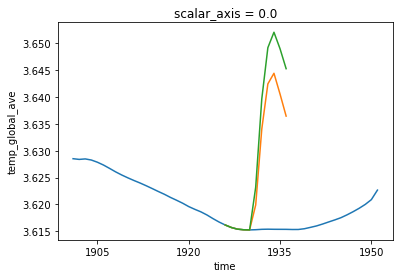

In [11]:
cont_scalar.temp_global_ave.sel(time=slice('1900-01-01','1950-01-01')).resample(time='A').mean().plot()
WCWC_scalar.temp_global_ave.sel(time=slice('1900-01-01','1950-01-01')).resample(time='A').mean().plot()
WCWCsp_scalar.temp_global_ave.sel(time=slice('1900-01-01','1950-01-01')).resample(time='A').mean().plot()

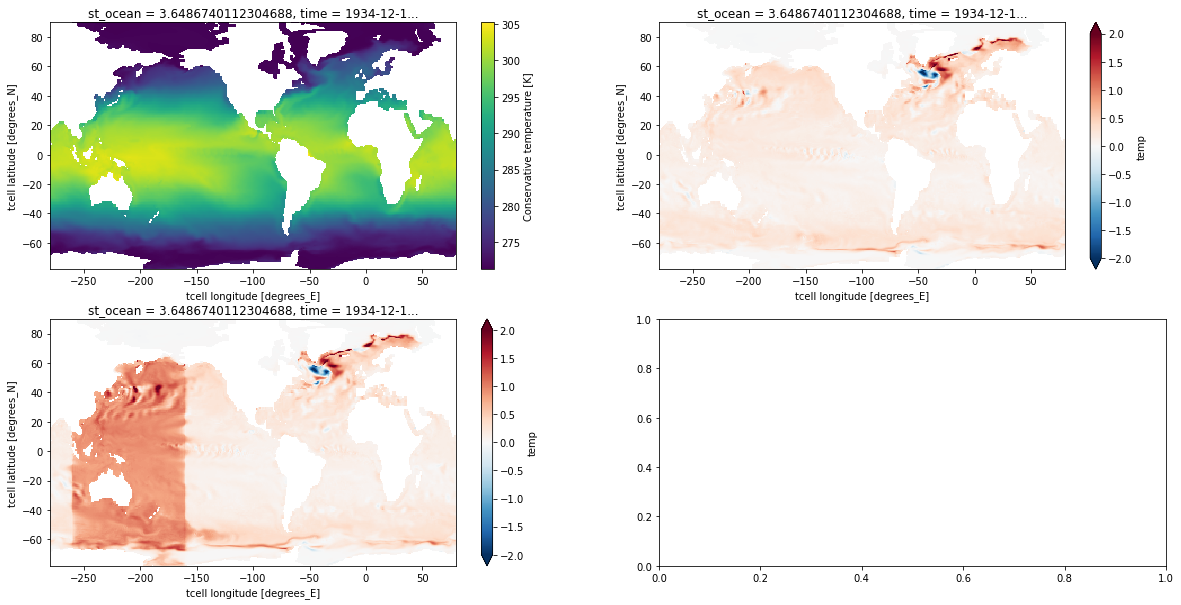

In [22]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(20,10))
CTRL = cont_temp.temp.isel(time=-1).isel(st_ocean=1)
WCWC = WCWC_temp.temp.isel(time=-1).isel(st_ocean=1)
WCWCsp = WCWCsp_temp.temp.isel(time=-1).isel(st_ocean=1)

CTRL.plot(ax=axes[0][0])
(WCWC-CTRL).plot(ax=axes[0][1],vmin=-2.,vmax=2.,cmap='RdBu_r')
(WCWCsp-CTRL).plot(ax=axes[1][0],vmin=-2.,vmax=2.,cmap='RdBu_r')

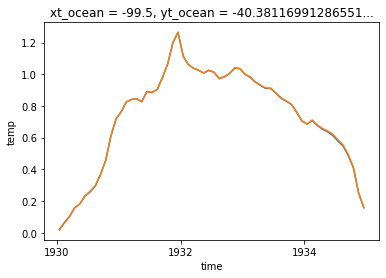

In [26]:
# Time series at specific location (Eastern Pacific):
CTRL = cont_temp.temp.isel(st_ocean=1).sel(xt_ocean=-100.,method='nearest').sel(yt_ocean=-40.,method='nearest')
#cont_temp.temp.isel(st_ocean=1).sel(xt_ocean=-100.,method='nearest').sel(yt_ocean=-40.,method='nearest').plot()
(WCWC_temp.temp.isel(st_ocean=1).sel(xt_ocean=-100.,method='nearest').sel(yt_ocean=-40.,method='nearest')-CTRL).plot()
(WCWCsp_temp.temp.isel(st_ocean=1).sel(xt_ocean=-100.,method='nearest').sel(yt_ocean=-40.,method='nearest')-CTRL).plot()


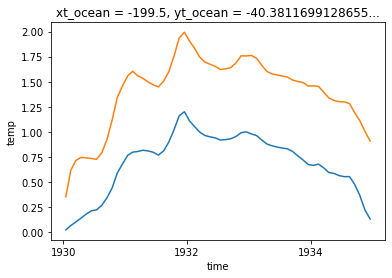

In [27]:

# Time series at specific location (Western Pacific):
CTRL = cont_temp.temp.isel(st_ocean=1).sel(xt_ocean=-200.,method='nearest').sel(yt_ocean=-40.,method='nearest')
#cont_temp.temp.isel(st_ocean=1).sel(xt_ocean=-100.,method='nearest').sel(yt_ocean=-40.,method='nearest').plot()
(WCWC_temp.temp.isel(st_ocean=1).sel(xt_ocean=-200.,method='nearest').sel(yt_ocean=-40.,method='nearest')-CTRL).plot()
(WCWCsp_temp.temp.isel(st_ocean=1).sel(xt_ocean=-200.,method='nearest').sel(yt_ocean=-40.,method='nearest')-CTRL).plot()